In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
df['target'] = data.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
# train test split

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [ ]:
y_train

,target
118,2
18,0
4,0
45,0
59,1
...,...
133,2
137,2
72,1
140,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier

DecisionTreeClassifier()

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

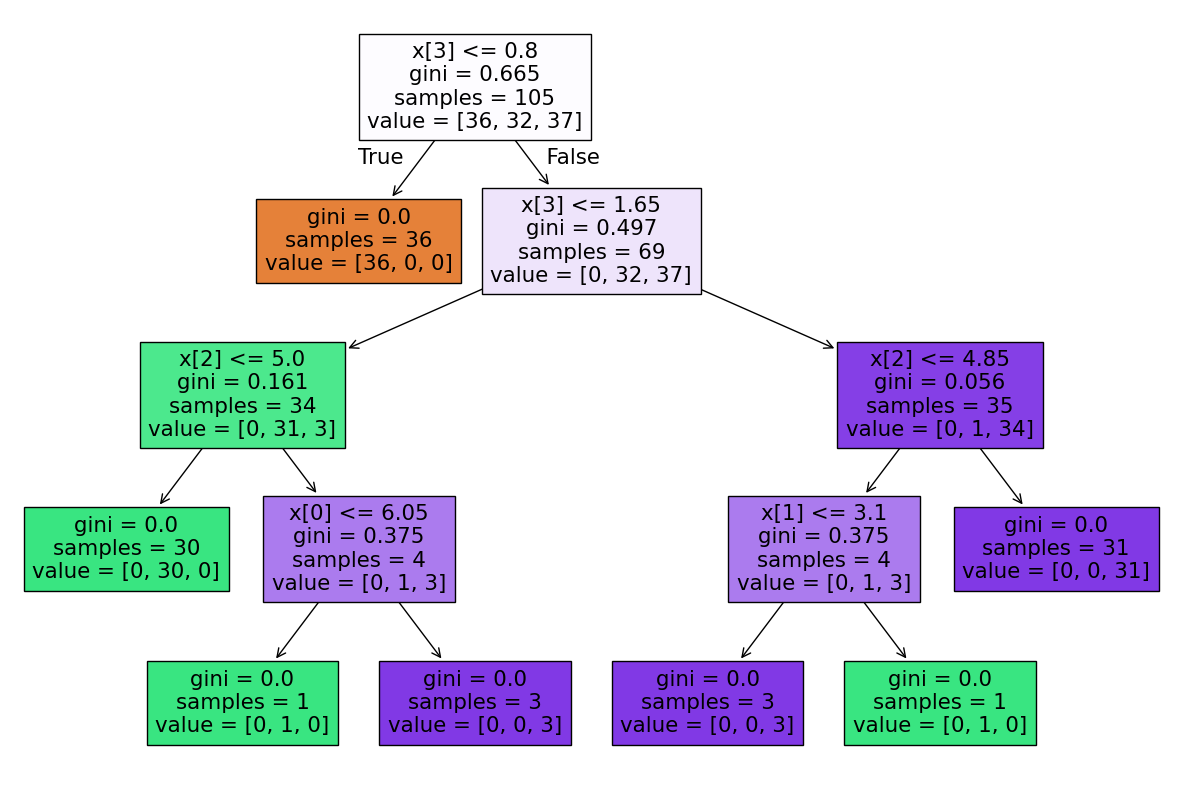

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9555555555555556

In [ ]:
# post pruning

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

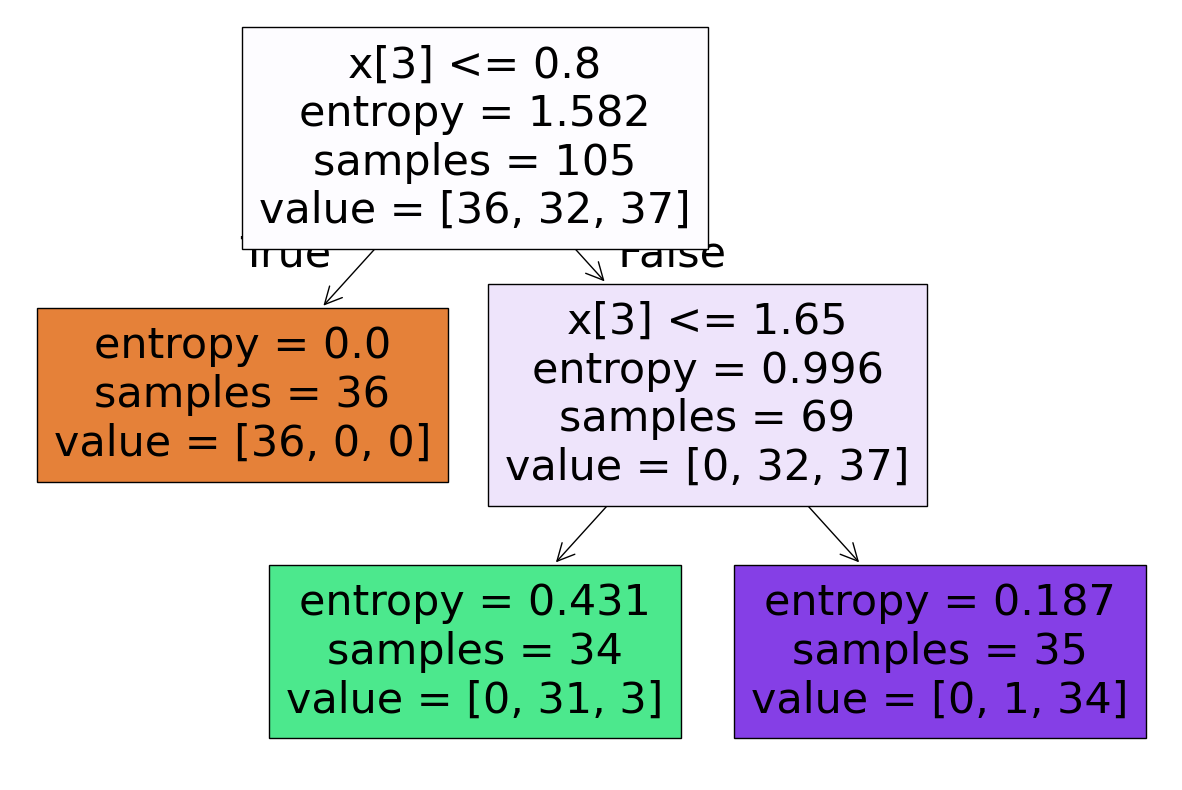

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [ ]:
accuracy_score(y_test,y_pred)

0.9555555555555556

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
# Prepruning using hyperparameter tuning

parameter  = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,10],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf =  DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid = parameter, cv=5,scoring = 'accuracy',verbose = 3)

In [ ]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, scor

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_pred = model.best_estimator_.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [ ]:
accuracy_score(y_test,y_pred)

0.9333333333333333